In [1]:
import sys, os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import linregress

In [2]:
try:
    sys.path.append('/home/piotr/CodeProjects/MhcEvo2000/PyScripts/')
except:
    sys.path.append('/home/piotr/CodeProjects/mhcevolution/PyScripts/')
import sex_selection_on_MHC_numb as ssmn

In [3]:
cd /home/piotr/Documents/MHC_UAM/sexSelect

/home/piotr/Documents/MHC_UAM/sexSelect


In [4]:
df_1 = pd.read_csv("Integr_1e5.csv")
df_5 = pd.read_csv("Integr_5e5.csv")

In [5]:
print(df_1.dtypes)
print(np.unique(df_1['SEXSELECT']))

patho_spp       int64
SEXSELECT      object
meanAllel     float64
stdAllel      float64
slope         float64
indvMean      float64
indvSTD       float64
meanFitt      float64
meanCvFitt    float64
meanPatho     float64
stdPato       float64
dtype: object
['MaxDiffer' 'MinShared' 'MinSharedUnc' 'PropShared' 'PropSharedUnc'
 'Random']


In [6]:
ax_label = 26
T_label = 30
TicksFS = 24
ordr = ['Random','MinShared', 'MinSharedUnc', 'PropShared', 'PropSharedUnc', 'MaxDiffer']

In [7]:
myPallt = ["#6ACC65", "#4878CF", "#D65F5F", "#B47CC7", "#C4AD66", "#77BEDB"]
palDct = {"4": myPallt[0], "8": myPallt[1], "16": myPallt[2]}
def plotBox(what, df, patho_mut, ordr, ymaxx=None, legd=True, mPlt=myPallt):
    """Fast plot of what we want"""
    ax = sns.boxplot(x="SEXSELECT", y=what, hue="patho_spp", data=df, order=ordr, palette=mPlt)
    ax.legend_.remove()
    if legd:
        plt.legend(title="Patho. spp.",title_fontsize=TicksFS-4, fontsize=TicksFS-2, loc=2, edgecolor='white')
    #plt.xlabel("sexual selection mode",fontsize=ax_label)
    plt.xticks(fontsize=TicksFS)
    plt.yticks(fontsize=TicksFS)
    plt.xlabel(None)
    plt.ylabel(None)
    plt.grid(True, axis="y")
    if ymaxx:
        plt.ylim((0, ymaxx))
    #plt.tight_layout()
    #plt.savefig(str(patho_mut) + "." + what + ".png")
    #plt.show()

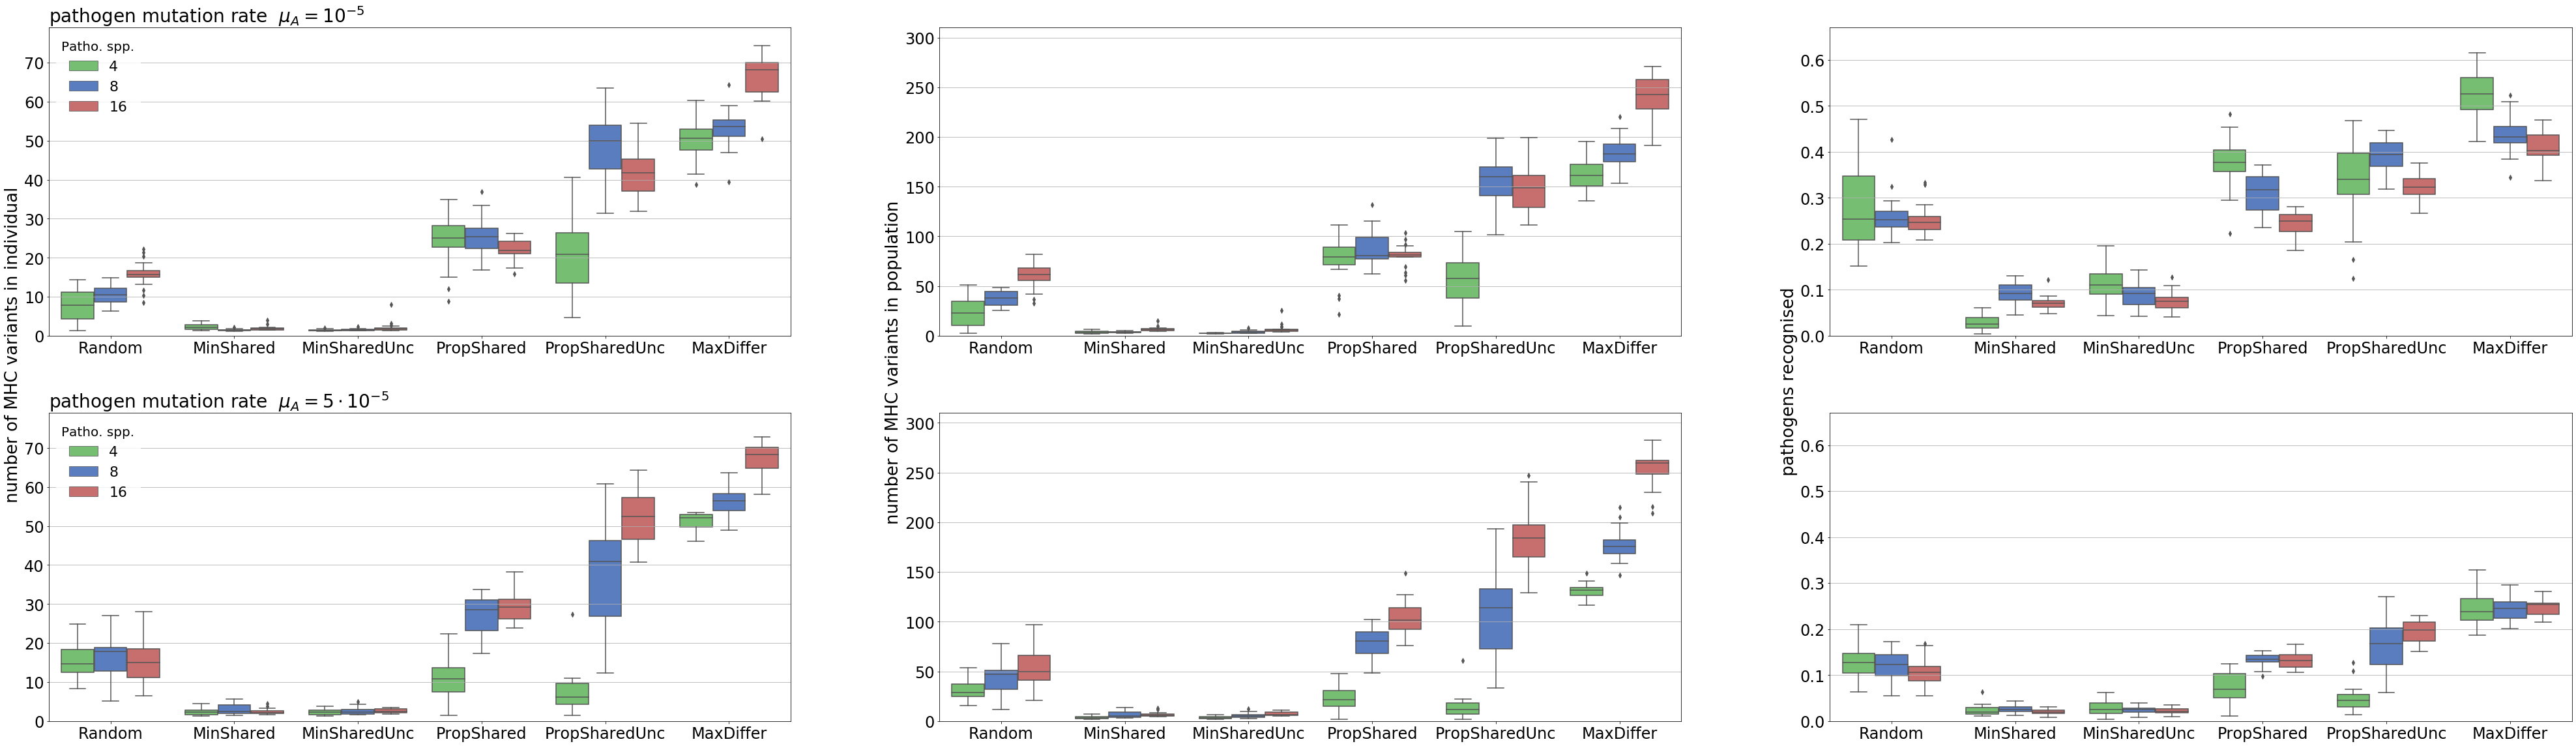

In [8]:
plt.figure(figsize=(55,16))

indvMHCmax = 79
popMHCmax = 310
pathoCntMax = 0.67

patho_mut = 0.00001
plt.subplot(231)
what = "indvMean"
plotBox(what, df_1, patho_mut, ordr, indvMHCmax, True)
plt.title("pathogen mutation rate  $\mu_{A} = 10^{-5}$", loc='left', fontsize=ax_label+2)
#plt.ylabel("number of MHC variants in individual", fontsize=ax_label)
plt.subplot(232)
what = "meanAllel"
plotBox(what, df_1, patho_mut, ordr, popMHCmax, False)
#plt.ylabel("number of MHC variants in population", fontsize=ax_label)
plt.subplot(233)
what = "meanPatho"
plotBox(what, df_1, patho_mut, ordr, pathoCntMax, False)
#plt.ylabel("mean normalised number of presented pathogens", fontsize=ax_label)

patho_mut = 0.00005
plt.subplot(234)
what = "indvMean"
plotBox(what, df_5, patho_mut, ordr, indvMHCmax, True)
plt.title("pathogen mutation rate  $\mu_{A} = 5 \cdot 10^{-5}$", loc='left', fontsize=ax_label+2)
plt.ylabel("            number of MHC variants in individual", fontsize=ax_label, horizontalalignment='left')
plt.subplot(235)
what = "meanAllel"
plotBox(what, df_5, patho_mut, ordr, popMHCmax, False)
plt.ylabel("        number of MHC variants in population", fontsize=ax_label, horizontalalignment='left')
plt.subplot(236)
what = "meanPatho"
plotBox(what, df_5, patho_mut, ordr, pathoCntMax, False)
plt.ylabel("                 pathogens recognised", fontsize=ax_label, horizontalalignment='left')
plt.tight_layout()
plt.subplots_adjust(hspace=0.25, wspace=0.2)
plt.savefig("sexSelectComprFull.png")
plt.show()

In [9]:
main_paper = ['Random', 'MinShared', 'PropShared', 'MaxDiffer']
df_1s = df_1.loc[df_1['SEXSELECT'].isin(main_paper)]
df_5s = df_5.loc[df_5['SEXSELECT'].isin(main_paper)]

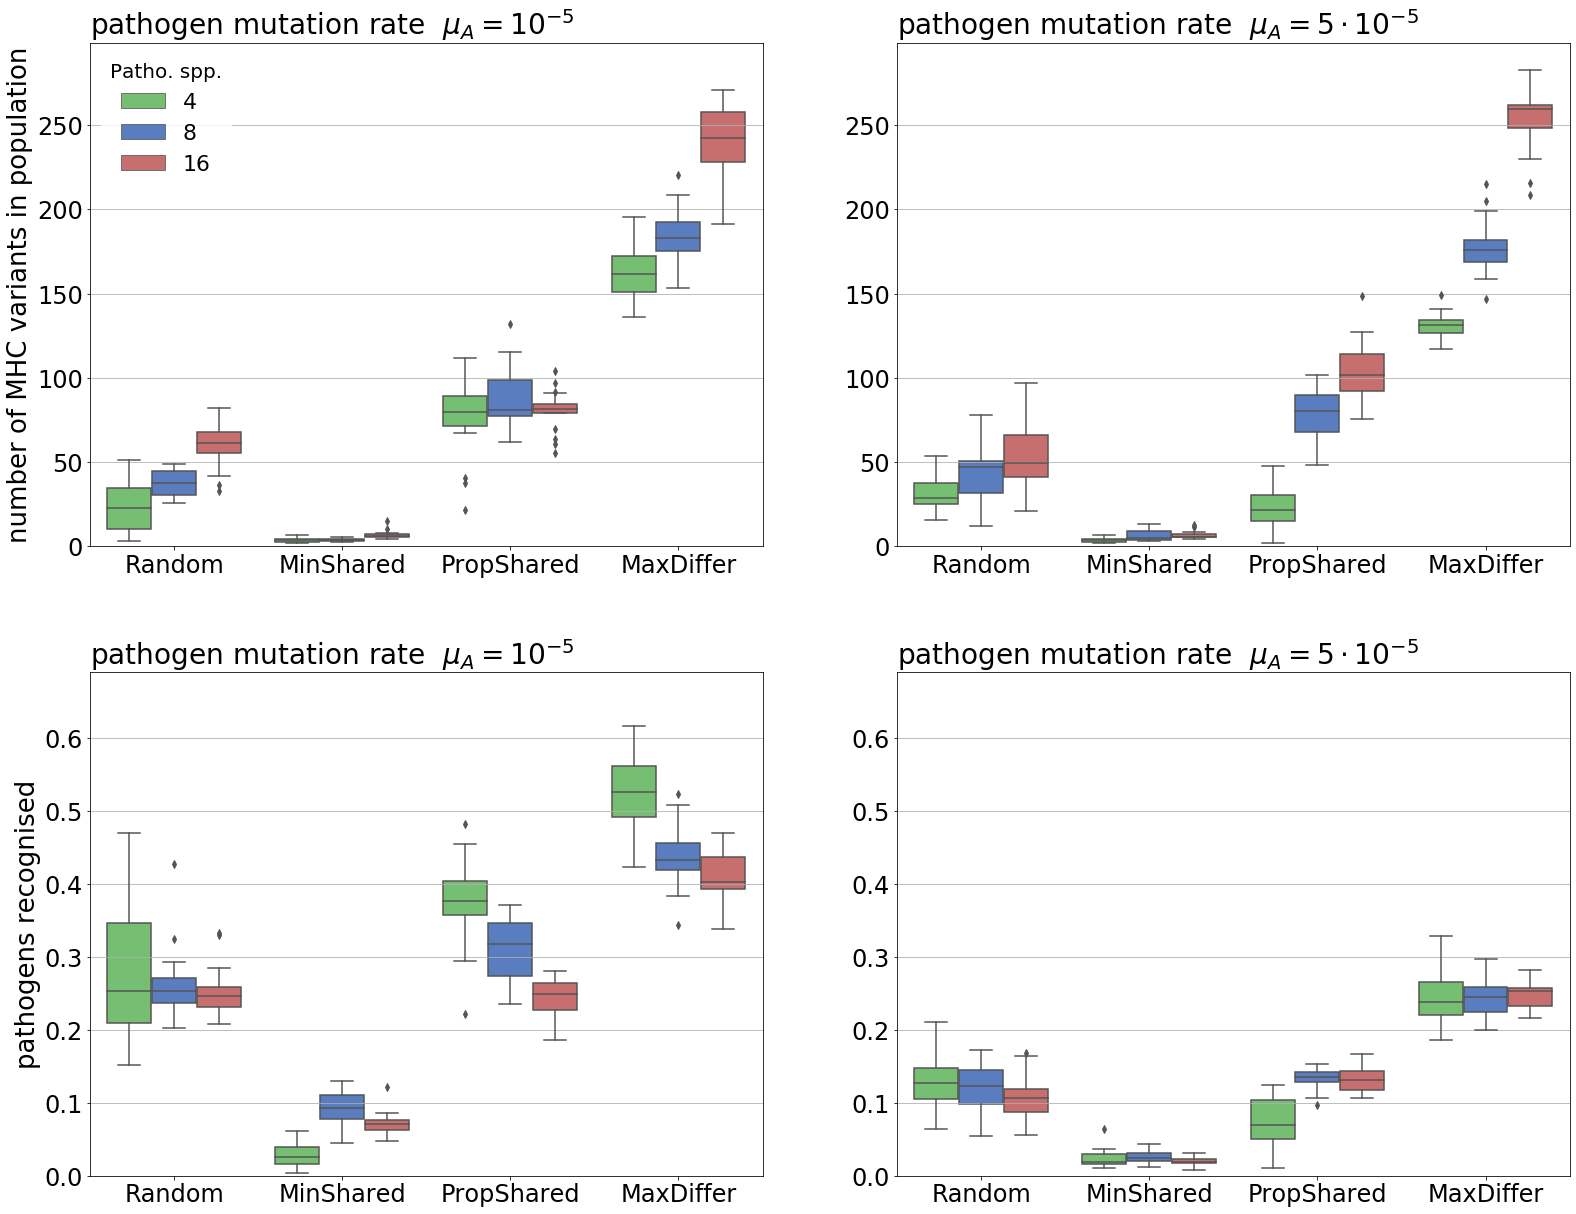

In [10]:
plt.figure(figsize=(22,17))

patho_mut = 0.00001
plt.subplot(221)
what = "meanAllel"
plotBox(what, df_1s, patho_mut, main_paper, 299, True)
plt.title("pathogen mutation rate  $\mu_{A} = 10^{-5}$", loc='left', fontsize=ax_label+2)
plt.ylabel("number of MHC variants in population", fontsize=ax_label)

patho_mut = 0.00005
plt.subplot(222)
what = "meanAllel"
plotBox(what, df_5s, patho_mut, main_paper, 299, False)
plt.title("pathogen mutation rate  $\mu_{A} = 5 \cdot 10^{-5}$", loc='left', fontsize=ax_label+2)
#plt.ylabel("            number of MHC variants in individual", fontsize=ax_label, horizontalalignment='left')

patho_mut = 0.00001
plt.subplot(223)
what = "meanPatho"
plotBox(what, df_1s, patho_mut, main_paper,0.69, False)
plt.title("pathogen mutation rate  $\mu_{A} = 10^{-5}$", loc='left', fontsize=ax_label+2)
plt.ylabel("pathogens recognised", fontsize=ax_label)

patho_mut = 0.00005
plt.subplot(224)
what = "meanPatho"
plotBox(what, df_5s, patho_mut, main_paper, 0.69, False)
plt.title("pathogen mutation rate  $\mu_{A} = 5 \cdot 10^{-5}$", loc='left', fontsize=ax_label+2)
#plt.ylabel("            number of MHC variants in individual", fontsize=ax_label, horizontalalignment='left')


plt.tight_layout()
plt.subplots_adjust(hspace=0.25, wspace=0.2)
plt.savefig("FigS1.png")
plt.show()

In [11]:
main_paper = ['MinSharedUnc', 'PropSharedUnc']
df_1s = df_1.loc[df_1['SEXSELECT'].isin(main_paper)]
df_5s = df_5.loc[df_5['SEXSELECT'].isin(main_paper)]

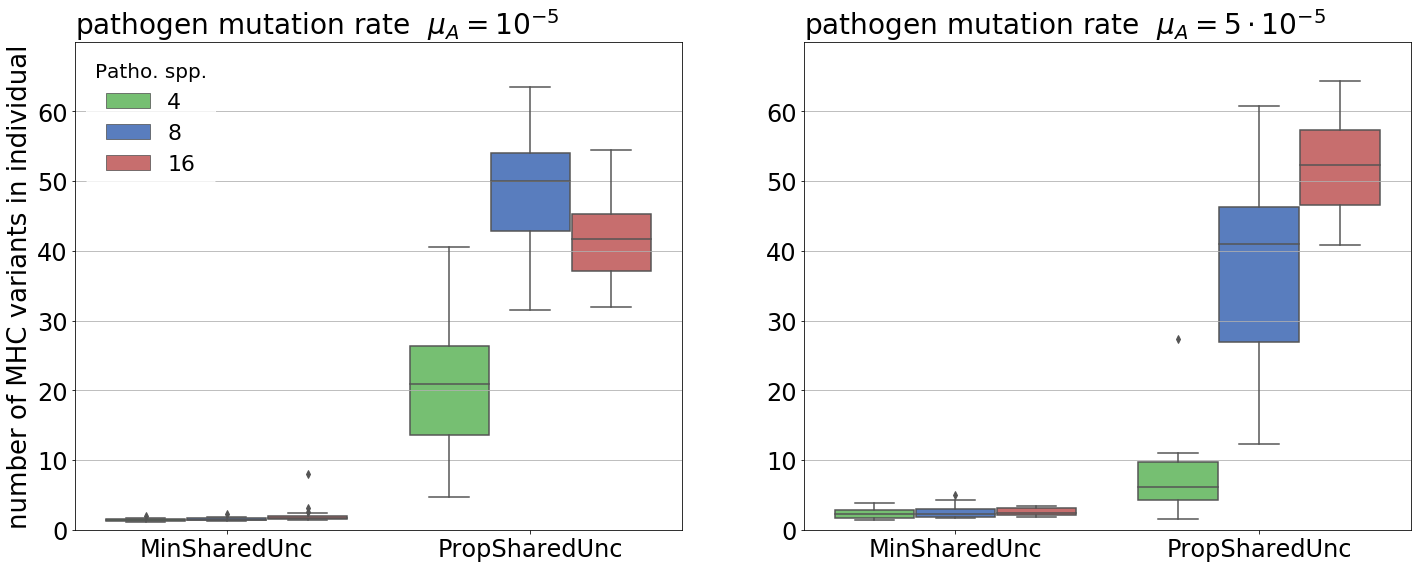

In [12]:
plt.figure(figsize=(20,8))

patho_mut = 0.00001
plt.subplot(121) #change this before re-anabling commented part
what = "indvMean"
plotBox(what, df_1s, patho_mut, main_paper, 69.9, True)
plt.title("pathogen mutation rate  $\mu_{A} = 10^{-5}$", loc='left', fontsize=ax_label+2)
plt.ylabel("number of MHC variants in individual", fontsize=ax_label)

patho_mut = 0.00005
plt.subplot(122) #change this before re-anabling commented part
what = "indvMean"
plotBox(what, df_5s, patho_mut, main_paper, 69.9, False)
plt.title("pathogen mutation rate  $\mu_{A} = 5 \cdot 10^{-5}$", loc='left', fontsize=ax_label+2)

"""
patho_mut = 0.00001
plt.subplot(323)
what = "meanAllel"
plotBox(what, df_1s, patho_mut, main_paper, 260, False)
plt.title("pathogen mutation rate  $\mu_{A} = 10^{-5}$", loc='left', fontsize=ax_label+2)
plt.ylabel("number of MHC variants in population", fontsize=ax_label)

patho_mut = 0.00005
plt.subplot(324)
what = "meanAllel"
plotBox(what, df_5s, patho_mut, main_paper, 260, False)
plt.title("pathogen mutation rate  $\mu_{A} = 5 \cdot 10^{-5}$", loc='left', fontsize=ax_label+2)
#plt.ylabel("            number of MHC variants in individual", fontsize=ax_label, horizontalalignment='left')

patho_mut = 0.00001
plt.subplot(325)
what = "meanPatho"
plotBox(what, df_1s, patho_mut, main_paper,0.49, False)
plt.title("pathogen mutation rate  $\mu_{A} = 10^{-5}$", loc='left', fontsize=ax_label+2)
plt.ylabel("pathogens recognised", fontsize=ax_label)

patho_mut = 0.00005
plt.subplot(326)
what = "meanPatho"
plotBox(what, df_5s, patho_mut, main_paper, 0.49, False)
plt.title("pathogen mutation rate  $\mu_{A} = 5 \cdot 10^{-5}$", loc='left', fontsize=ax_label+2)
#plt.ylabel("            number of MHC variants in individual", fontsize=ax_label, horizontalalignment='left')

"""
plt.tight_layout()
plt.subplots_adjust(hspace=0.25, wspace=0.2)
plt.savefig("FigS2.png")
plt.show()

In [13]:
main_paper = ['MaxDiffer']
df_1s = df_1.loc[df_1['SEXSELECT'].isin(main_paper)]
df_5s = df_5.loc[df_5['SEXSELECT'].isin(main_paper)]

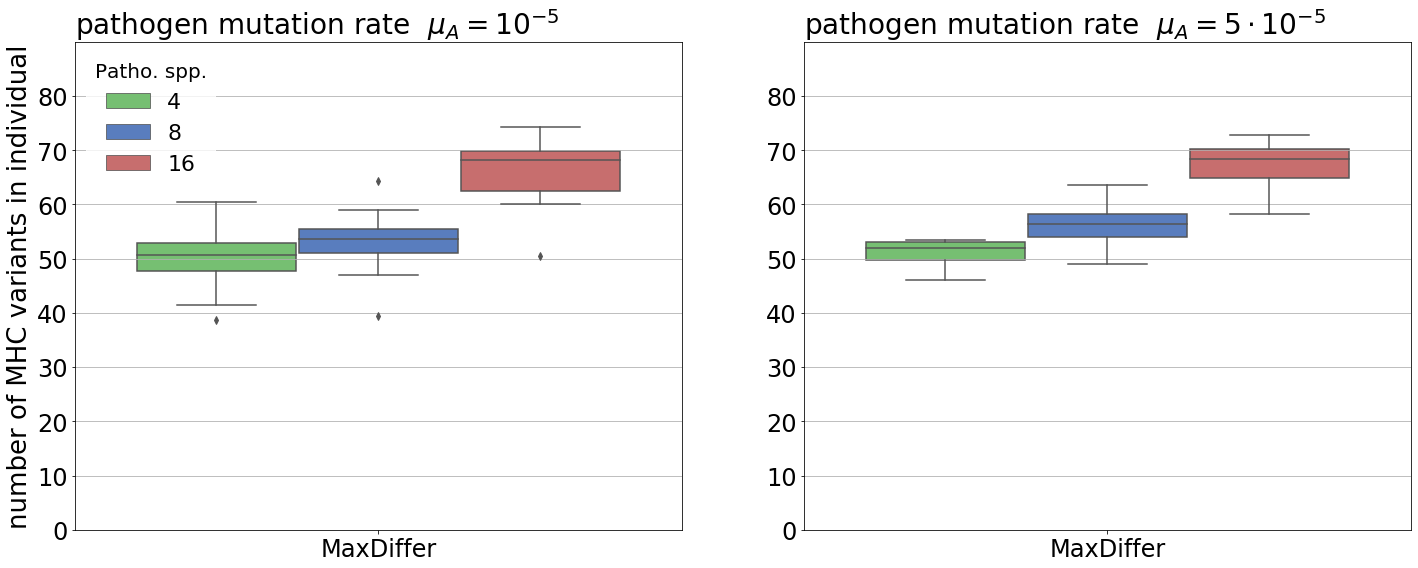

In [14]:
plt.figure(figsize=(20,8))

patho_mut = 0.00001
plt.subplot(121)  #change this before re-anabling commented part
what = "indvMean"
plotBox(what, df_1s, patho_mut, main_paper, 89.9, True)
plt.title("pathogen mutation rate  $\mu_{A} = 10^{-5}$", loc='left', fontsize=ax_label+2)
plt.ylabel("number of MHC variants in individual", fontsize=ax_label)

patho_mut = 0.00005
plt.subplot(122)  #change this before re-anabling commented part
what = "indvMean"
plotBox(what, df_5s, patho_mut, main_paper, 89.9, False)
plt.title("pathogen mutation rate  $\mu_{A} = 5 \cdot 10^{-5}$", loc='left', fontsize=ax_label+2)

"""
patho_mut = 0.00001
plt.subplot(323)
what = "meanAllel"
plotBox(what, df_1s, patho_mut, main_paper, 310, False)
plt.title("pathogen mutation rate  $\mu_{A} = 10^{-5}$", loc='left', fontsize=ax_label+2)
plt.ylabel("number of MHC variants in population", fontsize=ax_label)

patho_mut = 0.00005
plt.subplot(324)
what = "meanAllel"
plotBox(what, df_5s, patho_mut, main_paper, 310, False)
plt.title("pathogen mutation rate  $\mu_{A} = 5 \cdot 10^{-5}$", loc='left', fontsize=ax_label+2)
#plt.ylabel("            number of MHC variants in individual", fontsize=ax_label, horizontalalignment='left')

patho_mut = 0.00001
plt.subplot(325)
what = "meanPatho"
plotBox(what, df_1s, patho_mut, main_paper,0.69, False)
plt.title("pathogen mutation rate  $\mu_{A} = 10^{-5}$", loc='left', fontsize=ax_label+2)
plt.ylabel("pathogens recognised", fontsize=ax_label)

patho_mut = 0.00005
plt.subplot(326)
what = "meanPatho"
plotBox(what, df_5s, patho_mut, main_paper, 0.69, False)
plt.title("pathogen mutation rate  $\mu_{A} = 5 \cdot 10^{-5}$", loc='left', fontsize=ax_label+2)
#plt.ylabel("            number of MHC variants in individual", fontsize=ax_label, horizontalalignment='left')

"""
plt.tight_layout()
plt.subplots_adjust(hspace=0.25, wspace=0.2)
plt.savefig("FigS3.png")
plt.show()